# PROBABILITY

In [1]:
#Library Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

p(X) = [0.3 0.4 0.3]
p(Y) = [0.2 0.4 0.4]
E(X) = 1.0
E(Y) = 2.6
p(X|Y=4) = [0.  0.5 0.5]
p(Y|X=2) = [0.         0.33333333 0.66666667]
E(X+Y) = 3.6
#---
The joint probability of the independent variables X2 and Y2 is:
[[0.08 0.06 0.06]
 [0.08 0.06 0.06]
 [0.24 0.18 0.18]]
The expectation of XY is: 2.16
E(X+Y) = 3.3 or 3.3


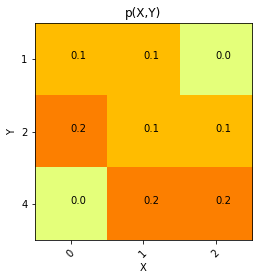

In [2]:
# JOINT DISTRIBUTIONS + PROBABILITIES

# Declares Probability Array
prob = np.array([[0.1,0.1,0.0],
                 [0.2,0.1,0.1],
                 [0.0,0.2,0.2]])
#---
pX2 = np.array([0.2,0.2,0.6])
pY2 = np.array([0.4,0.3,0.3])

# Declares X and Y (discrete variables)
X = [0,1,2]
Y = [1,2,4]
#---
X2 = np.array([1,2,3])
Y2 = np.array([0,1,2])

# Computes probabilities
pX = np.sum(prob,0)
pY = np.sum(prob,1)
EX = np.sum([pX[i] * X[i] for i in range(len(pX))])
EY = np.sum([pY[i] * Y[i] for i in range(len(pY))])
E_XplusY = EX + EY
pX_given_Y4 = prob[2,:]/pY[2]
pY_given_X2 = prob[:,2]/pX[2]
#---
EX2 = np.sum(X2*pX2)
EY2 = np.sum(Y2*pY2)
E_X2plusY2 = EX2 + EY2
# Computes the joint probability p(X,Y)
# Since the variables are independent we p(X,Y) = p(X)p(Y)
pXY = np.zeros([len(X2),len(Y2)])
for i in range(len(X2)):
    for j in range(len(Y2)):
        pXY[i,j] = pX2[i] * pY2[j]
#Computes X_times_Y
XY = np.zeros([len(X2),len(Y2)])
for i in range(len(X2)):
    for j in range(len(Y2)):
        XY[i,j] = X2[i] * Y2[j]
E_XY = np.sum(pXY*XY)
# Checks expectation linearity
X_plus_Y = np.zeros([len(X2),len(Y2)])
for i in range(len(X2)):
    for j in range(len(Y2)):
        X_plus_Y[i,j] = X2[i] + Y2[j]
E_X_plus_Y_verify = np.sum(pXY*X_plus_Y) 

# Prints computed probabilities
print(f"p(X) = {pX}")
print(f"p(Y) = {pY}")
print(f"E(X) = {EX}")
print(f"E(Y) = {EY}")
print(f"p(X|Y=4) = {pX_given_Y4}")
print(f"p(Y|X=2) = {pY_given_X2}")
print(f"E(X+Y) = {E_XplusY}\n#---")
print(f"The joint probability of the independent variables X2 and Y2 is:\n{pXY}")
print (f"The expectation of XY is: {E_XY}")
print(f"E(X+Y) = {E_X_plus_Y_verify} or {E_X2plusY2}")

# Declares plot
plt.clf()
plt.imshow(prob, 
           interpolation='nearest', 
           cmap=plt.cm.Wistia)
# Declares plot descriptions
plt.ylabel('Y')
plt.xlabel('X') 
plt.title('p(X,Y)') 
plt.xticks(np.arange(len(X)), X, rotation=45)
plt.yticks(np.arange(len(Y)), Y)
for i in range(len(X)):
    for j in range(len(Y)):
        plt.text(j,i, str(prob[i][j]))
# Prints plot
plt.show()

# DATA GENERATION

In [3]:
# Library Imports 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

In [4]:
x = np.random.randn(1000)
xs = np.linspace(-7,7,200) #Return evenly spaced numbers over a specified interval

In [5]:
dimension = 10
samples = 1000

xd = np.random.randn(dimension*samples).reshape(dimension,samples)
print(xd.shape)

(10, 1000)


In [6]:
L = np.random.randint(0,100,100).reshape(10,10)

## Linear Data Generation

In [7]:
# Generates purely linear data

xlin = np.random.randn(50); a = 5; b = -30
ylin = a * xlin + b

In [8]:
# Adds noise

ylin_noise = ylin + np.random.randn(len(ylin)) #Returns a sample (or samples) from the “standard normal” distribution.

## Multivariate Linear Data Generation

In [25]:
# Declares variables
n_input_dimensions = 3
n_output_dimensions = 2
n_samples = 50

# Generates data
xmul = np.random.randn(n_input_dimensions*n_samples).reshape(n_input_dimensions,
                                                             n_samples)
Amul = np.random.randint(-5,5,
                         n_input_dimensions*n_output_dimensions).reshape(n_output_dimensions,
                                                                         n_input_dimensions)
bmul = np.random.randint(-20,20,
                         n_output_dimensions)

# Generates multivariate linear data
ymul = (np.dot(Amul,xmul).T + bmul).T
noise_level = 100 # WE CAN CHANGE THE NOISE
noisemul = noise_level * np.random.randn(n_output_dimensions*n_samples).reshape(n_output_dimensions,
                                                                                n_samples)
ymul_noise = ymul + noisemul

print('The linear transformation is : \n' + str(Amul))
print('The constant term is : \n' + str(bmul))

The linear transformation is : 
[[ 0 -5  1]
 [ 0 -2 -4]]
The constant term is : 
[-18  -4]


# GAUSSIAN

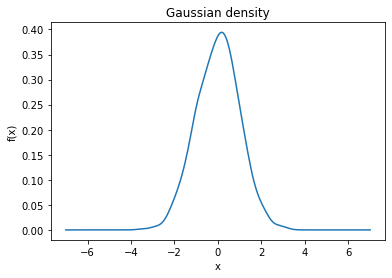

In [26]:
# Creates density
density = gaussian_kde(x)

# Declares and prints plot
plt.plot(xs, density(xs))
plt.title('Gaussian density')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

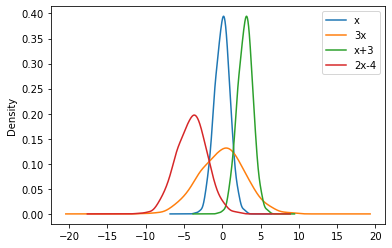

In [27]:
x1 = 3*x; x2 = x + 3; x3 = 2*x - 4
df = pd.DataFrame(np.vstack([x,x1,x2,x3]).T, columns = ['x','3x','x+3','2x-4'])
df.plot(kind="kde") 
plt.show()

# COVARIANCE MATRIX

The sample mean of the data is: 
[ 0.00106701  0.04436594 -0.00601566  0.00290052 -0.0264572  -0.02184153
 -0.02267625 -0.03432921 -0.00088101  0.04189807]

 The sample covariance is the following: 



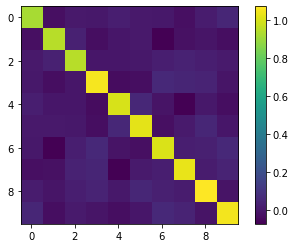

In [28]:
sample_mean = np.mean(xd,1)

print('The sample mean of the data is: \n' + str(sample_mean))
print('\n The sample covariance is the following: \n')
plt.imshow(np.cov(xd))
plt.colorbar()
plt.show()

# MATRIX MULTIPLICATION

In [29]:
# Performs dot product
x2 = np.dot(L,xd)
x2.shape

(10, 1000)

# LINEAR MODELS

In [30]:
# Library Imports

from sklearn import linear_model

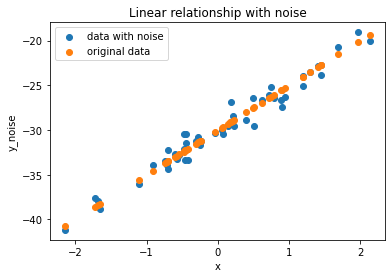

In [31]:
plt.scatter(xlin, ylin_noise, label = 'data with noise')
plt.scatter(xlin, ylin, label = 'original data')
plt.xlabel('x')
plt.ylabel('y_noise')
plt.legend()
plt.title('Linear relationship with noise')
plt.show()

In [32]:
# Declares and fits linear model
regression = linear_model.LinearRegression()
regression.fit(xlin.reshape(-1,1),ylin_noise)

# Retrieves parameters
estimated_params = np.array([regression.intercept_, regression.coef_], dtype="object")
real_parameters = np.array([b,a])

# Calculates RMSE
est_rmse = np.sqrt(np.mean((estimated_params - real_parameters)**2))

# Prints results
print('The estimated regression parameters are: \n')
print('Intercept: ' + str(regression.intercept_) + '\n')
print('Slope: ' + str(regression.coef_) + '\n')
print('The root mean squared estimation error for the parameters is: ' + str(est_rmse))

The estimated regression parameters are: 

Intercept: -30.004065495987366

Slope: [4.8739307]

The root mean squared estimation error for the parameters is: [0.0891908]


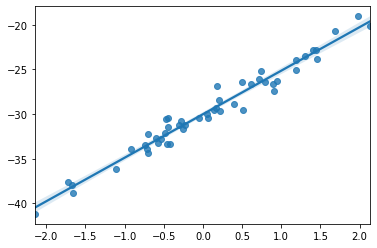

In [33]:
import seaborn as sns
sns.regplot(x=xlin, y=ylin_noise)
plt.show()

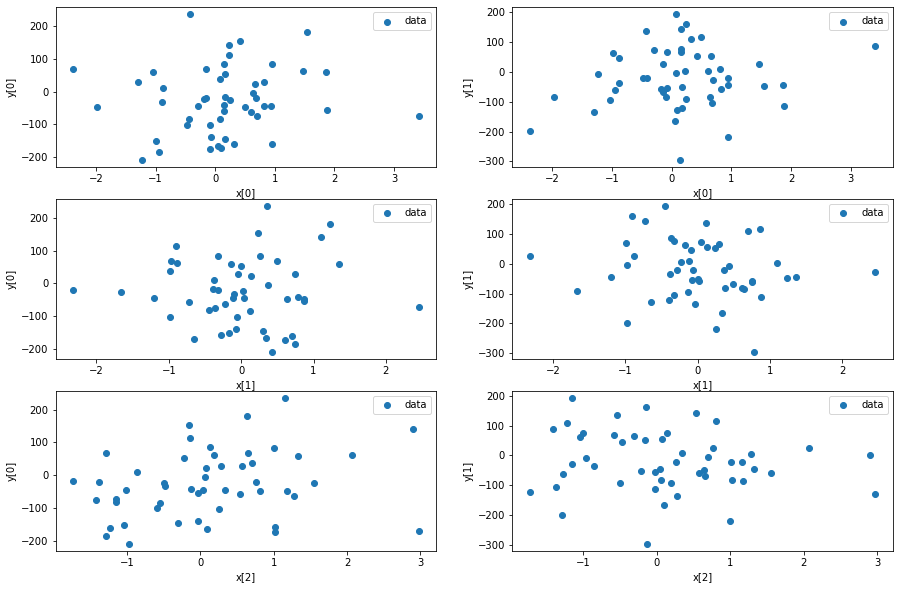

In [34]:
def pairwise_plot(x, y, predictions=None):
    """
    Prints a pairwise plot between input dimensions and output dimensions
    """
    n_input_dimensions = x.shape[0]
    n_output_dimensions = y.shape[0]
    plt.figure(figsize=(15,10))
    for i in range(n_input_dimensions):
        for j in range(n_output_dimensions):
            plt.subplot(n_input_dimensions, 
                        n_output_dimensions, 
                        i * n_output_dimensions + j + 1)
            plt.scatter(x[i,:], y[j,:],
                        marker = 'o', label = 'data')
            if predictions is not None:
                 plt.scatter(x[i,:],predictions[:,j],
                             marker = 'x', label = 'prediction')
            plt.xlabel('x[' + str(i) + ']')
            plt.ylabel('y[' + str(j) + ']')
            plt.legend()
    plt.show()

pairwise_plot(xmul, ymul_noise)   

In [35]:
regression = linear_model.LinearRegression()
regression.fit(xmul.T,ymul_noise.T)

print('The estimated coefficient matrix is \n:' + str(regression.coef_))
print('The estimated multivariate intercept is \n: ' + str(regression.intercept_))

The estimated coefficient matrix is 
:[[  7.8088583   -0.96232596  24.78408919]
 [ 18.76159924 -20.85448619 -14.68627762]]
The estimated multivariate intercept is 
: [-29.60389303 -21.62076389]


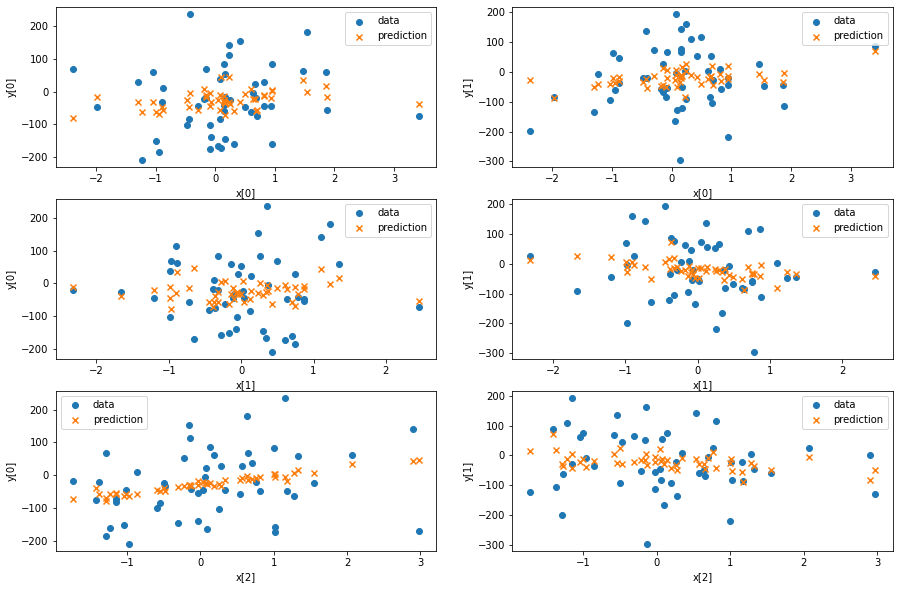

In [36]:
prediction = regression.predict(xmul.T)
pairwise_plot(xmul, ymul_noise, prediction) 

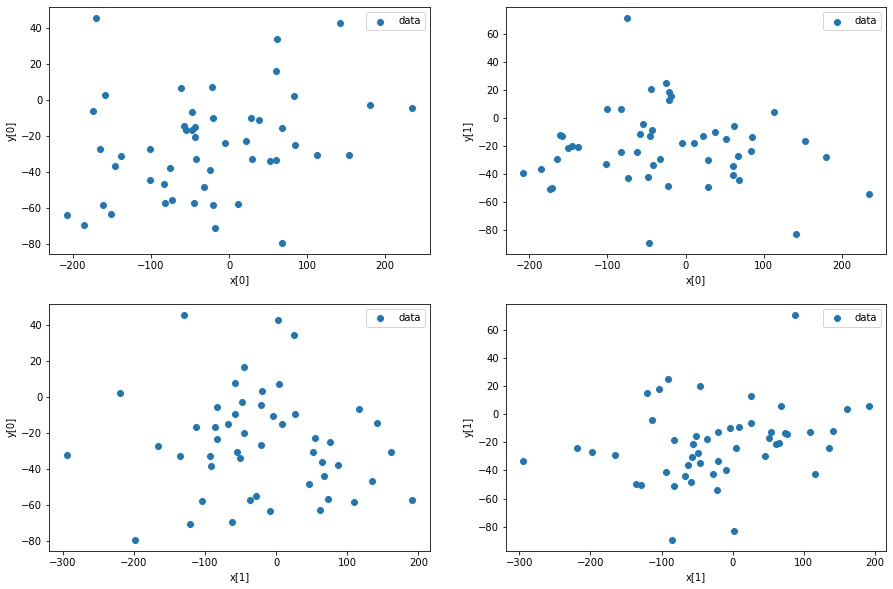

In [37]:
pairwise_plot(ymul_noise, prediction.T)

<hr>
<hr>
<hr>
<hr>
<hr>